In [1]:
import matplotlib.pyplot as plt
from bert_serving.client import BertClient
bc = BertClient(ip='127.0.0.1', port=8701, port_out=8702, show_server_config=True)

server config:
                        client	=	b27ae4d7-d9cd-40f6-a0fa-3890cdb52461
                   num_process	=	2                             
          ventilator -> worker	=	['ipc://tmpTPCY0X/socket', 'ipc://tmpC854rv/socket', 'ipc://tmpvs2bT2/socket', 'ipc://tmpCEtjkA/socket', 'ipc://tmp9IlrL7/socket', 'ipc://tmp4UIzcF/socket', 'ipc://tmpdwxIDc/socket', 'ipc://tmpEtKR4J/socket']
                worker -> sink	=	ipc://tmpLcFlJY/socket        
           ventilator <-> sink	=	ipc://tmposHSzq/socket        
           server_current_time	=	2019-02-20 22:19:30.748163    
                     statistic	=	{'num_data_request': 7, 'num_total_seq': 28, 'num_sys_request': 8, 'num_total_request': 15, 'num_total_client': 8, 'num_active_client': 1, 'avg_request_per_client': 1.875, 'min_request_per_client': 1, 'max_request_per_client': 2, 'num_min_request_per_client': 1, 'num_max_request_per_client': 7, 'avg_size_per_request': 4.0, 'min_size_per_request': 4, 'max_size_per_request': 4, 'num_

(4, 128, 768) [['[CLS]', 'first', 'do', 'it', '[SEP]'], ['[CLS]', 'then', 'do', 'it', 'right', '[SEP]'], ['[CLS]', 'then', 'do', 'it', 'better', '[SEP]'], ['[CLS]', 'in', 'the', 'middle', 'of', 'nowhere', ',', 'you', 'will', 'find', 'that', 'you', 'are', 'nobody', ',', 'nobody', 'in', 'the', 'middle', 'of', 'nowhere', '.', '[SEP]']]

 ['[CLS]', 'first', 'do', 'it', '[SEP]']
[CLS] 	 [-0.10847013  0.48369962 -0.6608401  -0.46292913 -0.6552724 ]
first 	 [ 0.30433774  0.9571423  -1.342407   -0.9284893   0.06614722]
do 	 [ 0.45341328  0.6813006  -0.74109334 -0.89703417 -0.44860092]
it 	 [-0.01381508 -0.5250735  -1.360941   -0.29845735  0.0249191 ]
[SEP] 	 [ 0.02385769  0.02313662 -0.02993909  0.02667386 -0.04177755]

 ['[CLS]', 'then', 'do', 'it', 'right', '[SEP]']
[CLS] 	 [ 0.48309234 -0.24086931 -0.4622559   0.1926166  -0.82915473]
then 	 [-0.39489493 -0.14877799 -0.34062698  0.3572751  -0.36671194]
do 	 [ 0.96297276  0.40037087 -0.18738087 -0.62975633 -0.28825474]
it 	 [ 0.5034886  -0.66

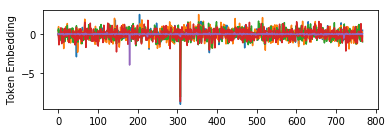

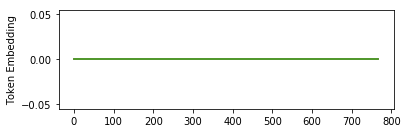

In [4]:
vec = bc.encode(
    ['First do it',  # [CLS] First do it [SEP] [word embedding for padding symbol]
     'then do it right', 
     'then do it better',
     'In the middle of nowhere, you will find that you are nobody, nobody in the middle of nowhere.'],
    show_tokens=True)

print(vec[0].shape, vec[1])
for idx_sentence in range(len(vec[1])):
    print('\n', vec[1][idx_sentence])
    for idx_token in range(len(vec[1][idx_sentence])):
        print(vec[1][idx_sentence][idx_token],'\t', vec[0][idx_sentence][idx_token][0:5])

vec = vec[0]

plt.subplot(2, 1, 1)
plt.plot(vec[0][0:5].T)
plt.ylabel('Token Embedding')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(vec[0][5:].T)
plt.ylabel('Token Embedding')
plt.show()